In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
def random_matrix(shape):
    A = np.random.rand(shape[0], shape[1])*50
    return A

def random_integer_matrix(shape):
    return np.floor(random_matrix(shape))

138.430997671 60.8595704834 (112, 92)


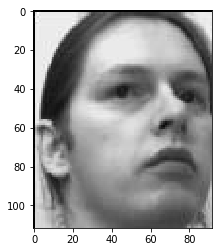

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

im = Image.open("image/umist_cropped.jpg")
data_orig = np.array(im)
# print(data_orig.shape)
# print(np.mean(data_orig), np.std(data_orig))

ws = (112,92)
data = data_orig[ws[0]:2*ws[0],ws[1]:ws[1]*2]
print(np.mean(data), np.std(data), data.shape)
plt.imshow(data, cmap='gray')
plt.show()

In [4]:
#SADA
X = data
I = 20
print(np.mean(X), np.std(X))

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5
#print(data_mean, data_variance)

gamma_scale = data_variance/data_mean # b/sqrt(a) == std
gamma_shape = data_mean/gamma_scale
print(gamma_scale, gamma_shape)

138.430997671 60.8595704834
3.34452487317 0.827806656672


In [17]:
def gibbs(X, gamma_shape, gamma_scale, max_iter):
    W = X.shape[0]
    K = X.shape[1]
    I = 20
    A_t = np.ones((W,I))*gamma_shape
    B_t = np.ones((W,I))*gamma_scale
    A_v = np.ones((I,K))*gamma_shape
    B_v = np.ones((I,K))*gamma_scale
    
    T = np.random.gamma(A_t,B_t)
    V = np.random.gamma(A_v,B_v)

    for n in range(max_iter):

        p = np.zeros((W, I ,K))
        S = np.zeros((W, I ,K))
        S1 = np.zeros((W, I))
        S2 = np.zeros((I, K))

        p = np.einsum("ik,kj->ikj", T, V)
        #p = p/np.sum(p, axis = 1, keepdims = True)
        p1 = np.sum(p, axis = 2)
        p1 = p1/np.sum(p1, axis = 1, keepdims = True)
        X1 = np.sum(X, axis = 1)
        for v in range(W):
            S1[v, :] = np.random.binomial(X1[v], p1[v, :].squeeze())


        alpha_t = A_t + S1
        beta_t = 1./(B_t + np.einsum("i,kj,j->ik",np.ones(W),V,np.ones(K)))
        T = np.random.gamma(alpha_t, beta_t)
        
        
        p2 = np.sum(p, axis = 0)
        p2 = p2/np.sum(p2, axis = 1, keepdims = True)
        X2 = np.sum(X, axis = 0)
        for t in range(K):
            S2[:, t] = np.random.binomial(X2[t], p2[:, t].squeeze())

        
        alpha_v = A_v + S2
        beta_v = 1./(B_v + np.einsum("i,ik,j->kj", np.ones(W), T, np.ones(K)))
        V = np.random.gamma(alpha_v, beta_v)

        if n % 50 == 0:
            mean_diff = np.mean(np.abs(X - np.dot(T,V)))
            print("epoch %d: loss: "%n, mean_diff)
    return T, V

In [18]:
T, V = gibbs(X, gamma_shape, gamma_scale, 400)

epoch 0: loss:  108.919587841
epoch 50: loss:  174.840831295
epoch 100: loss:  175.940589605
epoch 150: loss:  176.197182332
epoch 200: loss:  176.348228368
epoch 250: loss:  178.544155749
epoch 300: loss:  179.638283699
epoch 350: loss:  180.471593905


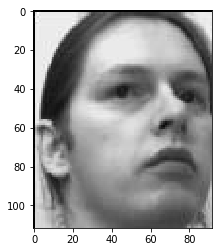

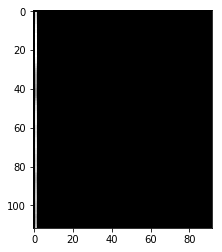

In [12]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(np.dot(T,V), cmap='gray')
plt.show()

In [14]:
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

138.430997671 60.8595704834
137.981331278 59.741020877


In [15]:
a = np.arange(1,7).reshape(2,3)
b = np.arange(1,13).reshape(3,4)
print (a)
print(b)

[[1 2 3]
 [4 5 6]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [16]:
c = np.einsum("ik, kj->kij", a,b)
print (c)

[[[ 1  2  3  4]
  [ 4  8 12 16]]

 [[10 12 14 16]
  [25 30 35 40]]

 [[27 30 33 36]
  [54 60 66 72]]]


In [17]:
d = a.dot(b)
d

array([[ 38,  44,  50,  56],
       [ 83,  98, 113, 128]])